In [1]:
from ml5_ipynb import ml5_detector

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Single Object Detection

In [3]:
img_path = 'pic/bird1.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 640
height = 420
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

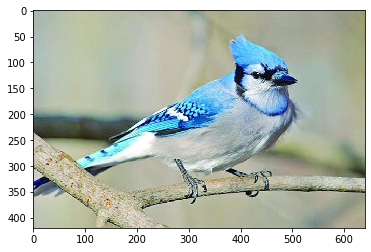

In [4]:
plt.imshow(img_rgba)

In [5]:
model1 = ml5_detector.ObjectDetector('yolo')

...................Modeal is ready


In [6]:
model1.image_detect(img_rgba,width=width,height=height)

...................done


In [7]:
model1.detect_result

[{'label': 'bird',
  'confidence': 0.4731248915195465,
  'x': 7.737941741943359,
  'y': 0,
  'width': 395.5834083557129,
  'height': 415.0275573730469,
  'normalized': {'x': 0.018600821495056152,
   'y': 0,
   'width': 0.9509216547012329,
   'height': 0.9976623975313627}}]

In [8]:
detect_result = model1.detect_result[-1]
x = int(detect_result['x'])
y = int(detect_result['y'])
w = int(detect_result['width'])
h = int(detect_result['height'])
x,y,w,h

(7, 0, 395, 415)

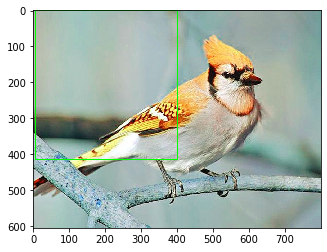

In [9]:
un_img = img.copy()
un_img = cv2.rectangle(un_img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(un_img)

In [10]:
normalized_x = int(detect_result['normalized']['x']*width)
normalized_y = int(detect_result['normalized']['y']*height)
normalized_w = int(detect_result['normalized']['width']*width)
normalized_h = int(detect_result['normalized']['height']*height)
normalized_x,normalized_y,normalized_w,normalized_h

(11, 0, 608, 419)

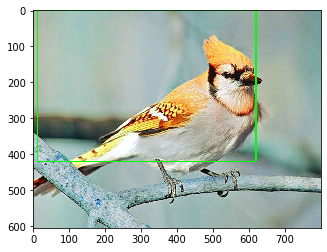

In [11]:
normalized_img = img.copy()
normalized_img = cv2.rectangle(normalized_img,(normalized_x,normalized_y),
                    (normalized_x+normalized_w,normalized_y+normalized_h),(0,255,0),2)
plt.imshow(normalized_img)

# Multiple Objects Detection

In [21]:
img_path = 'pic/faces.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 800
height = 600
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

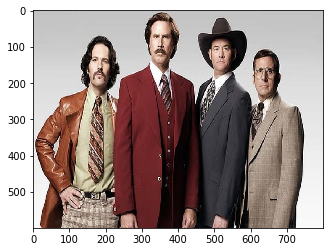

In [22]:
plt.imshow(img_rgba)

In [29]:
model_multi = ml5_detector.ObjectDetector('yolo')

.........Modeal is ready


In [30]:
model_multi.image_detect(img_rgba,width=width,height=height)

......................done


In [31]:
model_multi.detect_result

[{'label': 'tie',
  'confidence': 0.6919826865196228,
  'x': 179.43365478515625,
  'y': 114.27395629882812,
  'width': 12.822830200195312,
  'height': 65.35568237304688,
  'normalized': {'x': 0.43133090092585635,
   'y': 0.27469701033372146,
   'width': 0.03082411105816181,
   'height': 0.1571050057044396}},
 {'label': 'person',
  'confidence': 0.651992678642273,
  'x': 226.35888671875,
  'y': 16.538272857666016,
  'width': 88.30813598632812,
  'height': 394.9179039001465,
  'normalized': {'x': 0.5441319392277644,
   'y': 0.03975546360015869,
   'width': 0.212279173044058,
   'height': 0.9493218843753521}},
 {'label': 'person',
  'confidence': 0.5450376868247986,
  'x': 302.8742980957031,
  'y': 107.03392028808594,
  'width': 80.68051147460938,
  'height': 270.78086853027344,
  'normalized': {'x': 0.7280632165762094,
   'y': 0.25729307761559117,
   'width': 0.19394353719858023,
   'height': 0.6509155493516189}},
 {'label': 'tie',
  'confidence': 0.40682464838027954,
  'x': 320.94796752

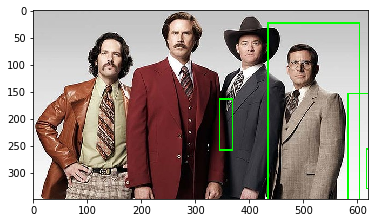

In [34]:
normalized_img = img.copy()
for i in range(len(model_multi.detect_result)):
    dt = model_multi.detect_result[i]
    normalized_x = int(dt['normalized']['x']*width)
    normalized_y = int(dt['normalized']['y']*height)
    normalized_w = int(dt['normalized']['width']*width)
    normalized_h = int(dt['normalized']['height']*height)
    normalized_img = cv2.rectangle(normalized_img,(normalized_x,normalized_y),
                        (normalized_x+normalized_w,normalized_y+normalized_h),(0,255,0),2)

plt.imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB))